<a href="https://colab.research.google.com/github/bhrshabani/loan_prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Table of Contents**

**Loading the data/libraries**

**Data description**

**Exploratory Data Analysis (EDA)**

   1. Missing values 
   2. Numerical
   3. Outlier
   4. Categorical
   5. Imbalance dataset
   6. Correration

**preprocess**

1.   Handling missing values
2.   Handling Outlier
3.   Handling Categorical features
5.   Feature Engineering


**Feature Importance**

**Building and Evaluating Models**

1. XGBoost
2. Decision Tree
3. Random Forest
4. Logistic Regression

**Conclusion**


#### Data fields:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 


In [ ]:
# import libraries
import pandas as pd
import numpy as np
from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import plotly
sns.set_style('white')
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 



from sklearn.tree import _tree
from collections import Counter

from sklearn.feature_selection import VarianceThreshold

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 1000)
pd.set_option('max_rows',40)
pd.set_option('max_columns',1000)

In [ ]:
#load data
uploaded = files.upload()
#store the data
dataset = pd.read_csv("rain_train(1).csv")


Saving rain_train(1).csv to rain_train(1) (1).csv


In [ ]:
data=dataset.copy()

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


dataset has 614 sample and 13 features

In [ ]:
data.shape

(614, 13)

In [ ]:
print(data.columns.values)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


The information shows we have null and categorical features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [ ]:
data.describe(include='O').T

,count,unique,top,freq
Loan_ID,614,614,LP002224,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


dataset is imbalance so we should handle it

In [ ]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
data.apply(lambda x:x.nunique())

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Exploratory Data Analysis


1.   Missing values
2.   Numerical
2.   Outlier
3.   Categorical
5.   Imbalance dataset
6.   Correration

### 1. Missing values
7 features include missing values.

In [ ]:
data.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

## 2. Numerical Features
-	temporal
- discrete
-continuous

there are 5 numerical features

In [ ]:
numerical_features = data.select_dtypes(exclude='object')
print( numerical_features.columns)
print("===============================================")
print('number of Numerical features: {}'.format(len(numerical_features.columns)))

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
number of Numerical features: 5


### temporal

In [ ]:
temporal_val = data.select_dtypes(include='datetime64')
print(temporal_val.columns)
print("===============================================")
print('Number of temporal features: {}'.format(len(temporal_val.columns)))

Index([], dtype='object')
Number of temporal features: 0


### Discrete

In [ ]:
discrete_val =  data.select_dtypes(include='int64')
print(discrete_val.columns) 
print("===============================================")
print('Number of discrete features : {}'.format(len(discrete_val.columns)))

Index(['ApplicantIncome'], dtype='object')
Number of discrete features : 1


### Continuous

In [ ]:
continuous_val =  data.select_dtypes(include='float64')
print(continuous_val.columns) 
print("===============================================")
print('Number of discrete features : {}'.format(len(continuous_val.columns)))

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')
Number of discrete features : 4


## Univariate

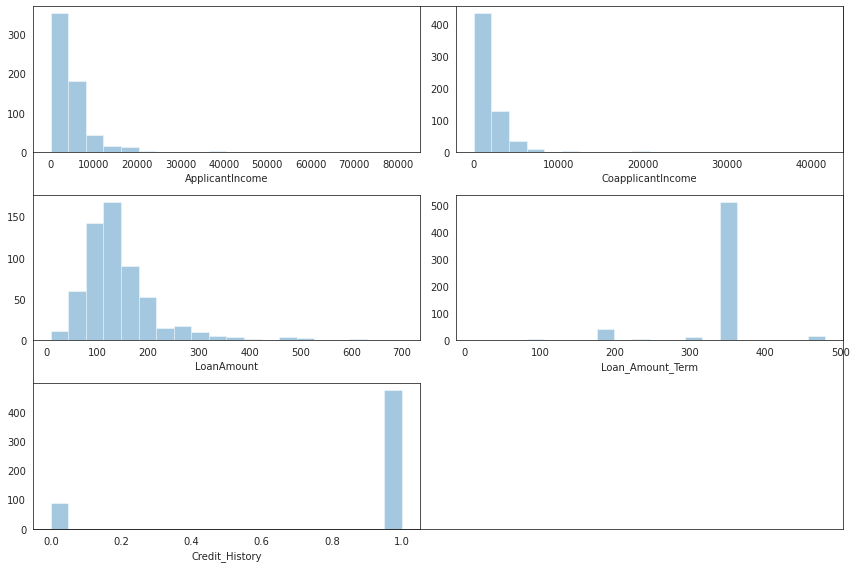

In [ ]:
# Histogram plot
fig,axes = plt.subplots(figsize=(12,8))
axes.grid(False)
axes.set_yticklabels([])
axes.set_xticklabels([])
for idx,num_col in enumerate(numerical_features):
    fig.add_subplot(3, 2, idx+1)
    sns.distplot(data[num_col], kde=False, bins=20)
    fig.tight_layout()

## Bivariate

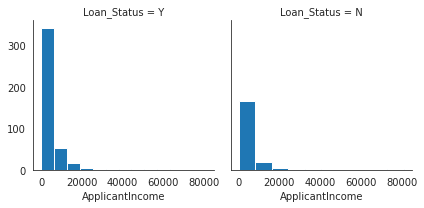

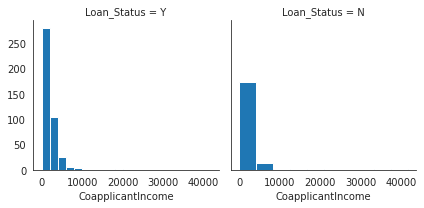

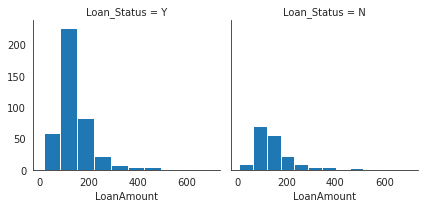

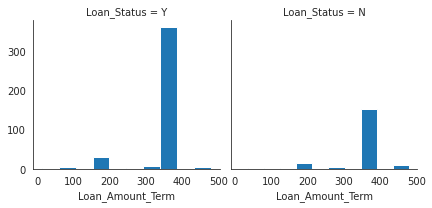

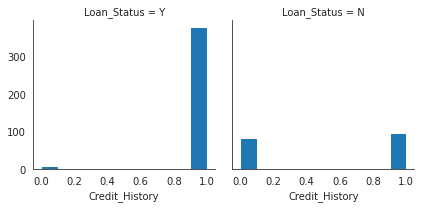

In [ ]:
for num_col in numerical_features:
  g = sns.FacetGrid(data, col='Loan_Status')
  g.map(plt.hist, num_col, bins=10)

## 3. OUTLIER

Numerical features have outlier. if it is neccessary, we can handle them

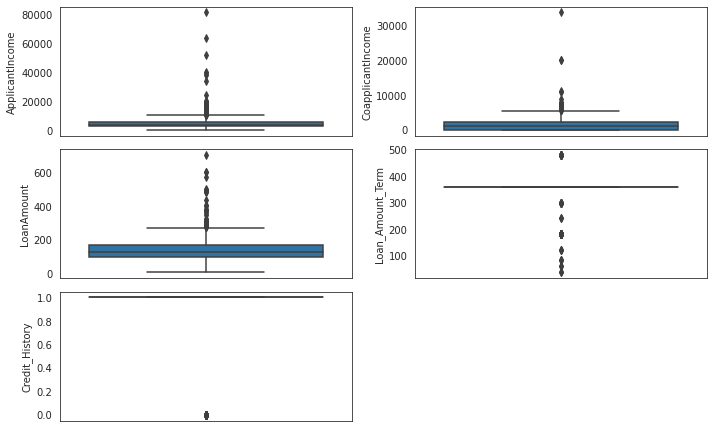

In [ ]:
# Histogram plot
fig = plt.figure(figsize=(10,10))
for index,col in enumerate(numerical_features):
    plt.subplot(5,2,index+1)
    sns.boxplot(data=numerical_features.dropna(), y=col)
fig.tight_layout(pad=1.0)

## 4. Categorical Features

There are 8 categorical features one of them is target value and the other is loan_id which can drop from categorical values

In [ ]:
categorical_features = data.select_dtypes(include='object')
print(categorical_features.columns)
print('===============================================')
print('number of categorical features: {}'.format(len(categorical_features.columns)))

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
number of categorical features: 8


In [ ]:
categorical_features = categorical_features.drop(['Loan_Status','Loan_ID'], axis=1)

### Univarite

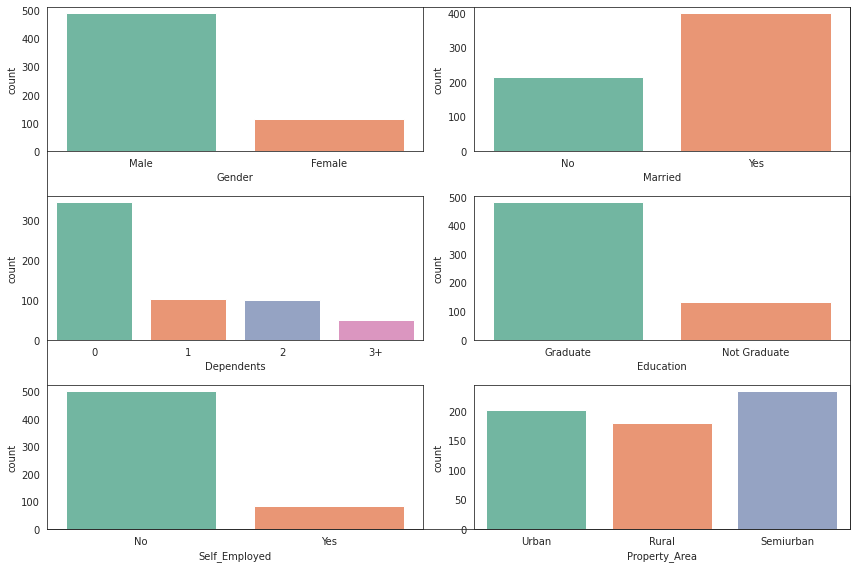

In [ ]:
fig,axes = plt.subplots(figsize=(12,8))
rgb_values = sns.color_palette("Set2", 6)
axes.grid(False)
axes.set_yticklabels([])
axes.set_xticklabels([])
for idx,cat_col in enumerate(categorical_features): 
    fig.add_subplot(3, 2, idx+1)
    sns.countplot(x=cat_col, data=data, palette=rgb_values)
    fig.tight_layout()

### Bivariate

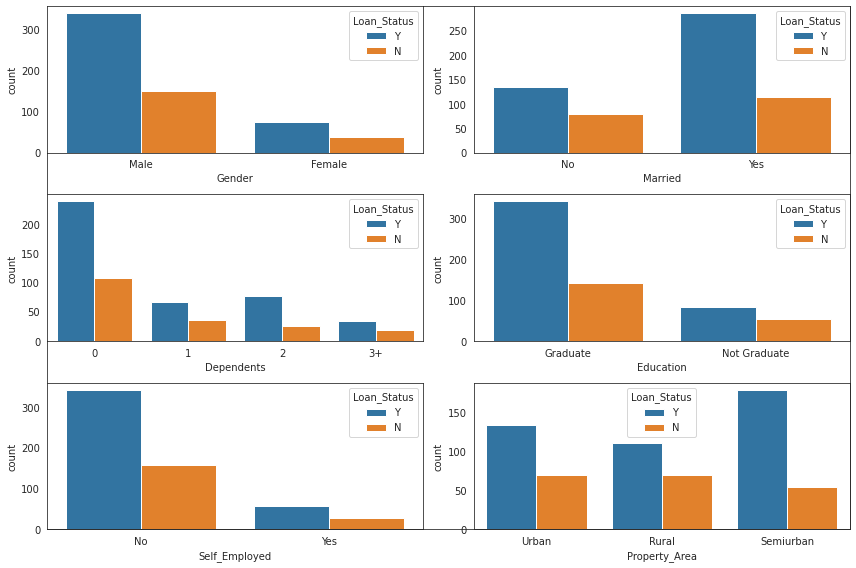

In [ ]:
fig,axes = plt.subplots(figsize=(12,8))
axes.grid(False)
axes.set_yticklabels([])
axes.set_xticklabels([])
for idx,cat_col in enumerate(categorical_features):
    fig.add_subplot(3, 2, idx+1)
    sns.countplot(x=data[cat_col],data=data,hue='Loan_Status')
    fig.tight_layout()

## 5. Imbalance dataset
Target value is imbalance before making model we can handle it 

In [ ]:
#control the percent of target values
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

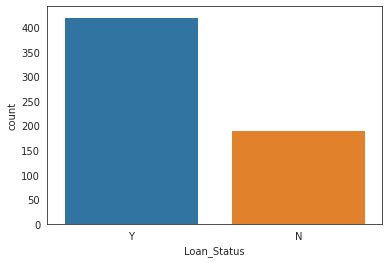

In [ ]:
# plot target value
sns.countplot(x='Loan_Status', data=data)

## 6.Features correlation

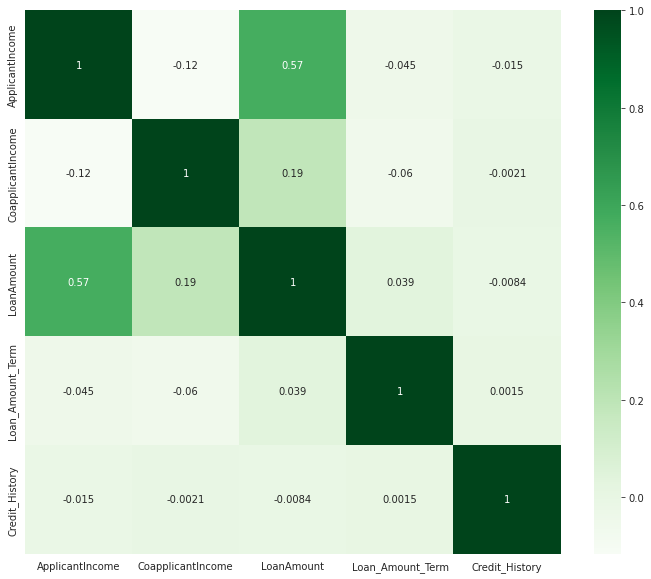

In [ ]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

# Preprocess


1.   Handling missing values
2.   Handling Outlier
3.   Handling Categorical features
5.   Feature Engineering
4.   Transformaton



## 1. Handling missing values

In [ ]:
data.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Handling continuous missing values with mean value

In [ ]:
for feature in numerical_features.isnull():
    data[feature].fillna(data[feature].mean(), inplace=True)

### Handling categorical missing values with mode

In [ ]:
for feature in categorical_features.isnull():
    data[feature].fillna(data[feature].mode()[0], inplace=True)

## 2. Handling Outlier

It is not neccessary to handle outlier because they are part of normal condition

In [ ]:
skewed_features =['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

In [ ]:
def low_upper_band(X_data, feature):
           #### Lets compute the Interquantile range to calculate the boundaries
           IQR=data[feature].quantile(0.75)-data[feature].quantile(0.25)
           #### Extreme outliers
           lower_bridge=data[feature].quantile(0.25)-(IQR*3)
           upper_bridge=data[feature].quantile(0.75)+(IQR*3)
           return lower_bridge, upper_bridge

In [ ]:
for feature in skewed_features:
  print(feature,':', low_upper_band(data, feature ))

ApplicantIncome : (-5875.0, 14547.5)
CoapplicantIncome : (-6891.75, 9189.0)
LoanAmount : (-93.25, 358.25)
Loan_Amount_Term : (360.0, 360.0)
Credit_History : (1.0, 1.0)


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## 3.Handling Categorical features

In [ ]:
categorical_features.apply(lambda x:x.nunique())

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=categorical_features.columns, drop_first=True)

In [ ]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,N,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,Y,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,Y,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,0,0,0,0,1


**Target** value is categorical it is necessary to convert to numerical

In [ ]:
le = preprocessing.LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [ ]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,0,0,0,1


# Feature importance

In [ ]:
X = data.drop(['Loan_Status', 'Loan_ID'] , axis=1)
y = data['Loan_Status']
# split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify =y,random_state =42)

In this predition we apply feature importance for finding important features and remove others. based on the chart all of features are effective in modeling

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  plt.figure(figsize=(8,6))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
xgbc = XGBClassifier()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

xgbc.fit(X, y)
random_forest.fit(X, y)
decision_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

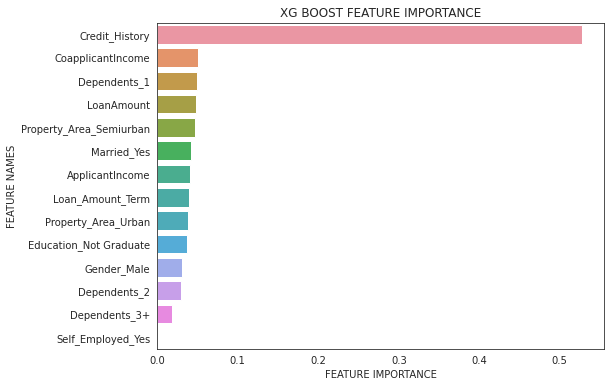

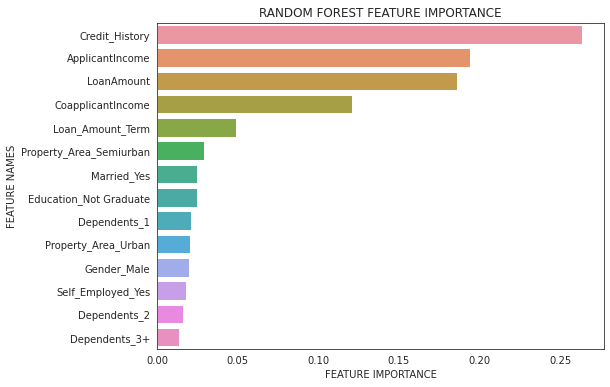

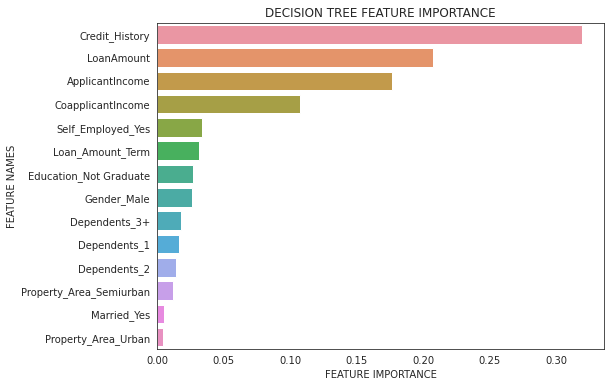

In [ ]:
#plot feature importance for three tree-based model
plot_feature_importance(xgbc.feature_importances_,X_train.columns,'XG BOOST')
plot_feature_importance(random_forest.feature_importances_,X_train.columns,'RANDOM FOREST')
plot_feature_importance(decision_tree.feature_importances_,X_train.columns,'DECISION TREE')

### Grid search for parameter tuning

In [ ]:
model_params = {
    'XGboost': {
        'model': XGBClassifier(),
        'params' : {
            'n_estimators'       : np.arange(100,500,100),     
            'learning_rate'      : np.arange(0, .3, .05),
            'max_depth'          : np.arange(5,30,5),
            'gamma'              : np.arange(.1,1,.2),
            
        }
    },
   
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators'       : np.arange(100, 500,100),   
            'max_depth'          : np.arange(5,20,5),
            'min_samples_leaf'   : np.arange(7,35,7),
            'criterion'          : ['gini', 'entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C'             :  np.arange(2,10,2),
            'penalty'       : ['l1','l2'],
            'solver'        : ['newton-cg', 'lbfgs', 'liblinear'],
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {   
            'max_depth'          : np.arange(5,20,5),
            'min_samples_leaf'   : np.arange(7,35,7),
            'criterion'          : ['gini', 'entropy'],
            
        }
    }     
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10,n_jobs=-1,verbose=2, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 18.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  5.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 237 out of 240 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.1s finished


In [ ]:

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,XGboost,0.782204,"{'gamma': 0.7000000000000001, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}"
1,random_forest,0.798408,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'n_estimators': 100}"
2,logistic_regression,0.796408,"{'C': 6, 'penalty': 'l2', 'solver': 'lbfgs'}"
3,decision_tree,0.794327,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 28}"


# Models

1. XGBClassifier

2. XGBClassifier with RandomOverSampler

3. XGBClassifier with RandomUnderSampler

4. XGBClassifier with SMOOTH

In [ ]:
print ('XGBClassifier')
print('\n')

model_XGBC = xgb.XGBClassifier(**scores[0]['best_params'])
# model_XGBC = xgb.XGBClassifier()

model_XGBC.fit(X_train,y_train)
y_predicted = model_XGBC.predict(X_test)

counter = Counter(y)
print(counter)
print('--------------------------')
print('Accuracy:',accuracy_score(y_test,y_predicted))
print('--------------------------')
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('--------------------------')
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('--------------------------')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('--------------------------')
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('================================================')

print('XGBClassifier with ROS')
print('\n')


ros = RandomOverSampler(sampling_strategy='minority', ratio=.75,random_state=0)

X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
model_XGBC.fit(X_train_ros, y_train_ros)
y_predicted = model_XGBC.predict(X_test.values)

counter = Counter(y_train_ros)
print(counter)
('--------------------------')
print('Accuracy:',accuracy_score(y_test,y_predicted))
('--------------------------')
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
('--------------------------')
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
('--------------------------')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
('--------------------------')
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('================================================')

print('XGBClassifier with RUS')
print('\n')



rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
model_XGBC.fit(X_train_rus, y_train_rus)
y_predicted = model_XGBC.predict(X_test.values)

counter = Counter(y_train_rus)
print(counter)
print('--------------------------')
print('Accuracy:',accuracy_score(y_test,y_predicted))
print('--------------------------')
print('F1 Score:', f1_score(y_test, y_predicted))
print('--------------------------')
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('--------------------------')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('================================================')

print('XGBClassifier with SMOOTH')
print('\n')



resampling = BorderlineSMOTE(kind='borderline-2')
pipeline = Pipeline([('SMOTE', resampling), ('Classifier', model_XGBC)])

pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test.values)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('--------------------------')
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('--------------------------')
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('--------------------------')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('--------------------------')
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))




XGBClassifier


Counter({1: 422, 0: 192})
--------------------------
Accuracy: 0.8292682926829268
--------------------------
F1 Score: 0.8200097436588475
--------------------------
ROC-AUC Score: 0.760061919504644
--------------------------
Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.58      0.68        38
           1       0.83      0.94      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.76      0.78       123
weighted avg       0.83      0.83      0.82       123

--------------------------
Confusion matrix:
 [[22 16]
 [ 5 80]]
XGBClassifier with ROS


Counter({1: 337, 0: 252})
Accuracy: 0.7967479674796748
F1 Score: 0.7943338567125476
ROC-AUC Score: 0.7510835913312693
Classifcation report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66        38
           1       0.84      0.87      0.86        85

    accuracy  

**Models:**

1. Decision Tree

2. Decision Tree with RandomOverSampler

3. Decision Tree with RandomUnderSampler

4. Decision Tree with SMOOTH

In [ ]:
print('Decision Tree')
print('\n')



decision_tree = DecisionTreeClassifier(**scores[3]['best_params'])

decision_tree.fit(X_train,y_train)
y_predicted = decision_tree.predict(X_test)

# print(Counter(y_train))

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Decision Tree with ROS')
print('\n')


ros = RandomOverSampler(sampling_strategy='minority', ratio=.75,random_state=0)

X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
decision_tree.fit(X_train_ros, y_train_ros)
y_predicted = decision_tree.predict(X_test)

counter = Counter(y_train_ros)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Decision Tree with RUS')
print('\n')




rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
decision_tree.fit(X_train_rus, y_train_rus)
y_predicted = decision_tree.predict(X_test)

counter = Counter(y_train_rus)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Decision Tree with SMOTH')
print('\n')

resampling = BorderlineSMOTE(kind='borderline-2')
pipeline = Pipeline([('SMOTE', resampling), ('Classifier', decision_tree)])

pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))

Decision Tree


Accuracy: 0.8130081300813008
F1 Score: 0.805149887569917
ROC-AUC Score: 0.748297213622291


Classifcation report:
               precision    recall  f1-score   support

           0       0.76      0.58      0.66        38
           1       0.83      0.92      0.87        85

    accuracy                           0.81       123
   macro avg       0.79      0.75      0.76       123
weighted avg       0.81      0.81      0.81       123

Confusion matrix:
 [[22 16]
 [ 7 78]]
--------------------


Decision Tree with ROS


Counter({1: 337, 0: 252})
Accuracy: 0.7967479674796748
F1 Score: 0.8018274117706466
ROC-AUC Score: 0.7947368421052632


Classifcation report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.71        38
           1       0.89      0.80      0.84        85

    accuracy                           0.80       123
   macro avg       0.77      0.79      0.78       123
weighted avg       0.82      0.80      0.

**Models:**

1. RandomForset

2. RandomForset with RandomOverSampler

3. RandomForset with RandomUnderSampler

4. RandomForset with SMOOTH

In [ ]:
print('Random Forest')
print('\n')




rf = RandomForestClassifier(**scores[1]['best_params'])
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))

print('-------------------------------------------')
print('\n')
print('Random Forest with ROS')
print('\n')


ros = RandomOverSampler(sampling_strategy='minority', ratio=.75,random_state=0)

X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
rf.fit(X_train_ros, y_train_ros)
y_predicted = rf.predict(X_test)

counter = Counter(y_train_ros)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Random Forest with RUS')
print('\n')

rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
rf.fit(X_train_rus, y_train_rus)
y_predicted = rf.predict(X_test)

counter = Counter(y_train_rus)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Random Forest with SMOTH')
print('\n')


resampling = BorderlineSMOTE(kind='borderline-2')
pipeline = Pipeline([('SMOTE', resampling), ('Classifier', rf)])

pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))



Random Forest


Accuracy: 0.8536585365853658
F1 Score: 0.8404405979543667
ROC-AUC Score: 0.7704334365325077


Classifcation report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

Confusion matrix:
 [[21 17]
 [ 1 84]]
-------------------------------------------


Random Forest with ROS


Counter({1: 337, 0: 252})
Accuracy: 0.8617886178861789
F1 Score: 0.8542936020095432
ROC-AUC Score: 0.798142414860681


Classifcation report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74        38
           1       0.85      0.96      0.91        85

    accuracy                           0.86       123
   macro avg       0.87      0.80      0.82       123
weighted avg     


**Models:**

1. Logistic Regression

2. Logistic Regression with RandomOverSampler

3. Logistic Regression with RandomUnderSampler

4. Logistic Regression with SMOOTH

In [ ]:
print('Logistic Regression')
print('\n')


scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

logr = LogisticRegression( **scores[2]['best_params'])
logr.fit(X_train_scaled, y_train)
y_predicted = logr.predict(X_test_scaled)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))

print('-------------------------------------------')
print('\n')
print('Logistic Regression with ROS')
print('\n')


ros = RandomOverSampler(sampling_strategy='minority', ratio=.75,random_state=0)

X_train_ros, y_train_ros = ros.fit_sample(X_train_scaled,y_train)
logr.fit(X_train_ros, y_train_ros)
y_predicted = logr.predict(X_test_scaled)

counter = Counter(y_train_ros)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Logistic Regression with RUS')
print('\n')


rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_sample(X_train_scaled,y_train)
logr.fit(X_train_rus, y_train_rus)
y_predicted = logr.predict(X_test_scaled)

counter = Counter(y_train_rus)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Logistic Regression with SMOTH')
print('\n')

resampling = BorderlineSMOTE(kind='borderline-2')
pipeline = Pipeline([('SMOTE', resampling), ('Classifier', logr)])

pipeline.fit(X_train_scaled, y_train) 
y_predicted = pipeline.predict(X_test_scaled)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))

Logistic Regression


Accuracy: 0.8617886178861789
F1 Score: 0.850398579307016
ROC-AUC Score: 0.7835913312693499


Classifcation report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Confusion matrix:
 [[22 16]
 [ 1 84]]
-------------------------------------------


Logistic Regression with ROS


Counter({1: 337, 0: 252})
Accuracy: 0.8292682926829268
F1 Score: 0.8256956372380624
ROC-AUC Score: 0.7818885448916408


Classifcation report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.86      0.91      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.78      0.79       123
weigh

# Conclusion
The results show that random forest with random oversample performs better than the other models in all metrics. and second score is for logistic regression